In [10]:
import requests
import pandas as pd
import time
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np



In [11]:
basketball_stats = pd.read_csv("NBA_Players.csv")
basketball_stats



,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,3985,Travis Diener,ORL,24.0,185.42,79.378600,Marquette,USA,2005.0,2,...,3.8,0.9,0.7,-13.7,0.017,0.086,0.149,0.614,0.126,2005-06
1,4007,Ryan Gomes,BOS,23.0,200.66,113.398000,Providence,USA,2005.0,2,...,7.6,4.9,1.0,0.0,0.092,0.173,0.160,0.548,0.069,2005-06
2,4013,Ronny Turiaf,LAL,23.0,208.28,112.944408,Gonzaga,France,2005.0,2,...,2.0,1.6,0.3,-0.9,0.079,0.203,0.142,0.537,0.078,2005-06
3,4014,Salim Stoudamire,ATL,23.0,185.42,81.192968,Arizona,USA,2005.0,2,...,9.7,1.9,1.2,-5.4,0.011,0.102,0.224,0.545,0.107,2005-06
4,4016,Sean May,CHA,22.0,205.74,120.655472,North Carolina,USA,2005.0,1,...,8.2,4.7,1.0,-3.1,0.115,0.211,0.251,0.474,0.105,2005-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,12836,Joe Harris,BKN,31.0,198.12,99.790240,Virginia,USA,2014.0,2,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022-23
5072,12838,Joe Wieskamp,TOR,23.0,198.12,92.986360,Iowa,USA,2021.0,2,...,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
5073,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014.0,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
5074,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017.0,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23


In [12]:
print(basketball_stats.columns)

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_21016/1189504440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  basketball_stats['draft_year'].replace('Undrafted', np.nan, inplace=True)
/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_21016/1189504440.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

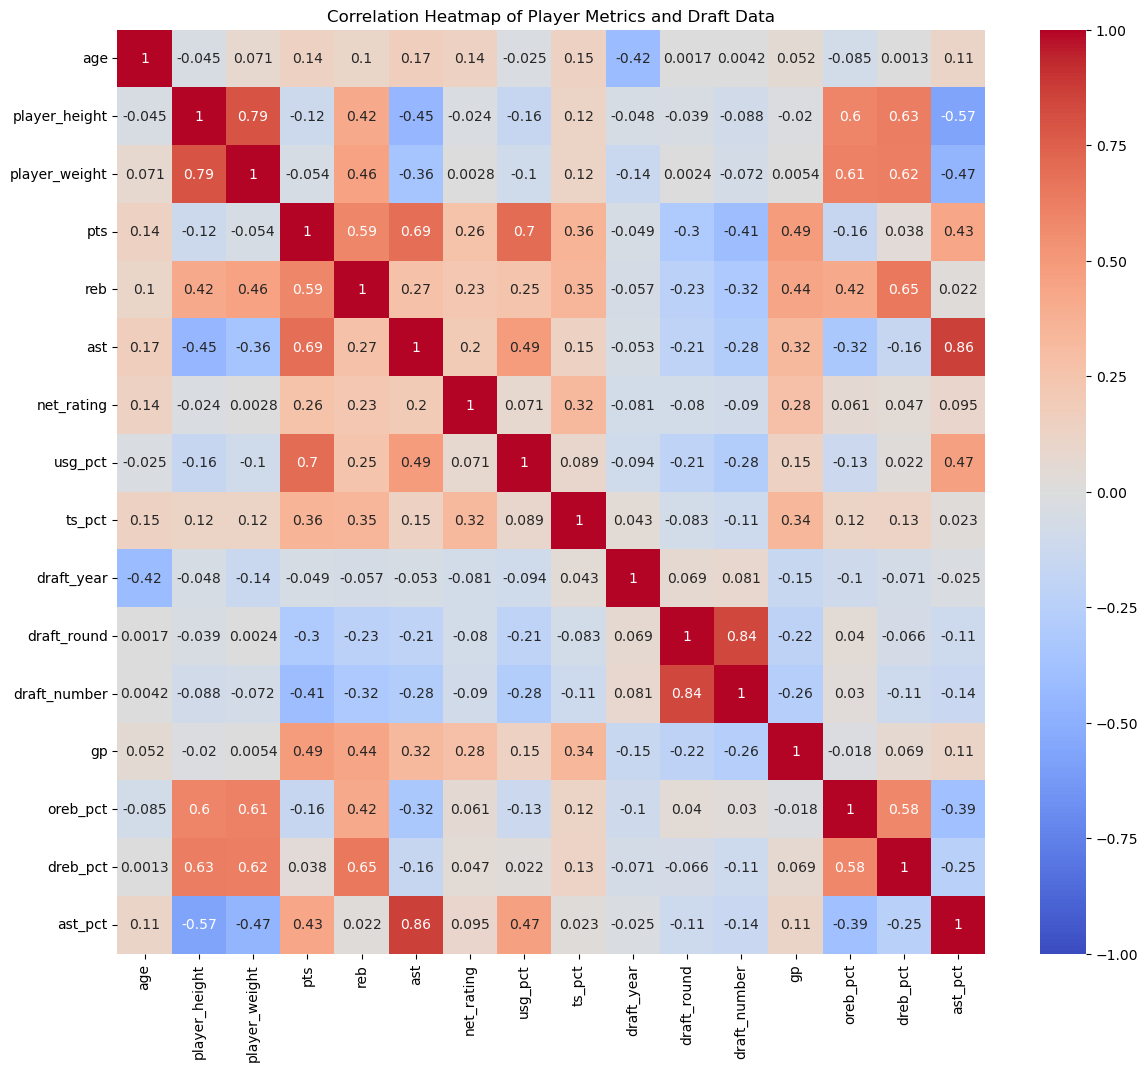

In [13]:
# Replace 'Undrafted' with NaN in draft-related columns
basketball_stats['draft_year'].replace('Undrafted', np.nan, inplace=True)
basketball_stats['draft_round'].replace('Undrafted', np.nan, inplace=True)
basketball_stats['draft_number'].replace('Undrafted', np.nan, inplace=True)

# Convert draft-related columns to numeric, forcing NaN where conversion fails
basketball_stats['draft_year'] = pd.to_numeric(basketball_stats['draft_year'], errors='coerce')
basketball_stats['draft_round'] = pd.to_numeric(basketball_stats['draft_round'], errors='coerce')
basketball_stats['draft_number'] = pd.to_numeric(basketball_stats['draft_number'], errors='coerce')

# Selecting a broader range of numeric metrics to analyze correlations
numeric_columns = basketball_stats[['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 
                                    'net_rating', 'usg_pct', 'ts_pct', 'draft_year', 'draft_round', 
                                    'draft_number', 'gp', 'oreb_pct', 'dreb_pct', 'ast_pct']]

# Dropping rows with NaN values in the selected columns
numeric_columns = numeric_columns.dropna()

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Player Metrics and Draft Data")
plt.savefig("correlation_heatmap.png")
plt.show()

This correlation heatmap reveals several key relationships amongst the basketball player metrics and draft data. Players with better physical attributes, such as height and weight, are more likely to be drafted earlier, which can be seen by the strong negative correlations between player_height and draft_number (r = -0.54) and between player_weight and draft_round (r = -0.62). Offensive performance metrics, such as points per game (pts) and usage percentage (usg_pct), also show a strong positive correlation (r = 0.69), indicating that players with higher usage rates tend to score more points. Similarly, defensive metrics like defensive rebound percentage (dreb_pct) are strongly correlated with overall rebounding numbers (r = 0.65), emphasizing the contribution of defensive effort to total rebounds. The negative correlation between age and draft_year (r = -0.56) highlights that older players were typically drafted in earlier years. Also, the relationship between draft_round and draft_number (r = 0.85) gives us the expected trend that later draft rounds correspond to higher (worse) draft pick numbers. There are other, less important variables from the heatmap, such as net_rating which give minimal correlations with other variables, suggesting a weak statisitc that doesn't really give much importance to the purpose of the heatmap. 

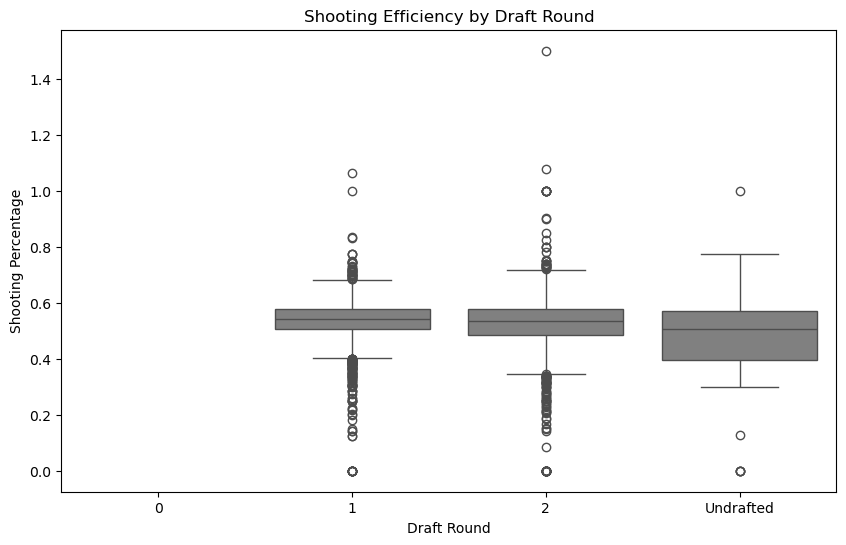

In [20]:
# Convert 'draft_round' to a categorical type with the correct order
basketball_stats['draft_round'] = pd.Categorical(basketball_stats['draft_round'], categories=[0, 1, 2, 'Undrafted'], ordered=True)

# Drop rows with NaN values in 'draft_round' and 'ts_pct' columns
filtered_data = basketball_stats.dropna(subset=['draft_round', 'ts_pct'])

# Create the box plot with no color
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='draft_round', y='ts_pct', color='gray')

# Adding labels and title
plt.xlabel('Draft Round')
plt.ylabel('Shooting Percentage')
plt.title('Shooting Efficiency by Draft Round')
plt.savefig("shooting_efficiency_updated.png")
plt.show()

The box plot shows the relationship between draft round and shooting efficiency (true shooting percentage ==> ts_pct), revealing that players drafted in earlier rounds generally have higher shooting percentages and greater variability in performance. Earlier rounds (ex: 1st and 2nd) exhibit a broad range of efficiencies, with many outliers suggesting that some players significantly outperform or underperform expectations. Conversely, players drafted in later rounds (ex: 6th to 8th) display lower median shooting percentages and less variability, possibly due to more specialized roles or reduced playing opportunities. Undrafted players (classified as Draft Round 0) show relatively consistent shooting efficiencies, with a narrow range of values indicating moderate success for those who secure playing time. 